## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

## Downloading necessary package

In [2]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nirajan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nirajan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nirajan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nirajan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Loading Dataset

In [3]:
df = pd.read_csv('datasets/bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
df.shape

(2225, 2)

In [5]:
inputs = df['text']
labels = df['labels']

<Axes: xlabel='labels', ylabel='Count'>

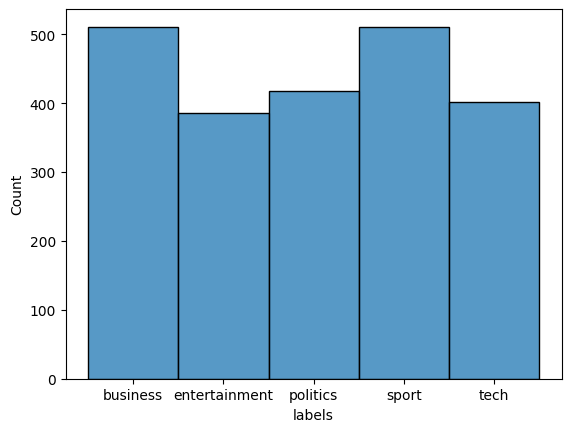

In [6]:
sns.histplot(labels)

Dataset is almost balanced.

### Data prepocessing (Dividing into train, test and also converting to numerical

In [7]:
Input_train, Input_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

In [8]:
vectorizer = CountVectorizer()

In [9]:
X_train = vectorizer.fit_transform(Input_train)
X_test = vectorizer.transform(Input_test)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780, 26762), (445, 26762), (1780,), (445,))

### Training the model and checking accuracy

In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Training score = {model.score(X_train, y_train)}')
print(f'Test score = {model.score(X_test, y_test)}')

Training score = 0.9943820224719101
Test score = 0.9730337078651685


## With stopwords

In [12]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(Input_train)
X_test = vectorizer.transform(Input_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Training score = {model.score(X_train, y_train)}')
print(f'Test score = {model.score(X_test, y_test)}')

(1780, 26469) (445, 26469) (1780,) (445,)
Training score = 0.9960674157303371
Test score = 0.9730337078651685


## With Lemmatization

In [13]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [14]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [15]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(Input_train)
X_test = vectorizer.transform(Input_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Training score = {model.score(X_train, y_train)}')
print(f'Test score = {model.score(X_test, y_test)}')

C:\Users\Nirajan\Desktop\Artificial Intelligence\NLP_Udemy\env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1780, 26438) (445, 26438) (1780,) (445,)
Training score = 0.9932584269662922
Test score = 0.9730337078651685


## With Stemming

In [16]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        token = word_tokenize(doc)
        return [self.porter.stem(word) for word in token]

In [17]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(Input_train)
X_test = vectorizer.transform(Input_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Training score = {model.score(X_train, y_train)}')
print(f'Test score = {model.score(X_test, y_test)}')

C:\Users\Nirajan\Desktop\Artificial Intelligence\NLP_Udemy\env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1780, 23209) (445, 23209) (1780,) (445,)
Training score = 0.9921348314606742
Test score = 0.9730337078651685


## Simple Tokenizer

In [18]:
def simple_tokenizer(s):
    return s.split()

In [19]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(Input_train)
X_test = vectorizer.transform(Input_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = MultinomialNB()
model.fit(X_train, y_train)

print(f'Training score = {model.score(X_train, y_train)}')
print(f'Test score = {model.score(X_test, y_test)}')

C:\Users\Nirajan\Desktop\Artificial Intelligence\NLP_Udemy\env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1780, 53531) (445, 53531) (1780,) (445,)
Training score = 0.9977528089887641
Test score = 0.9595505617977528


## Conclusion

Notice the size of vector in stopwords, lemmatization and stemming is smaller compared to simple tokenier.